<a href="https://colab.research.google.com/github/FahmidaNourin/Light_Sleep_And_Deep_Sleep_Classification/blob/main/Tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install plotly==5.11.0
!pip install -U kaleido

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sn
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from tqdm.notebook import tqdm
import plotly.graph_objects as go
import plotly.express as px

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 110.5 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.15.0
    Uninstalling plotly-5.15.0:
      Successfully uninstalled plotly-5.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires python-multipart, which is not in

#connecting with drive

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#read in csv file

In [4]:
import numpy as np
import pandas as pd


df = pd.read_csv("/content/drive/MyDrive/Sleep_Research/draft/HMC_Sleep_Stages.csv")

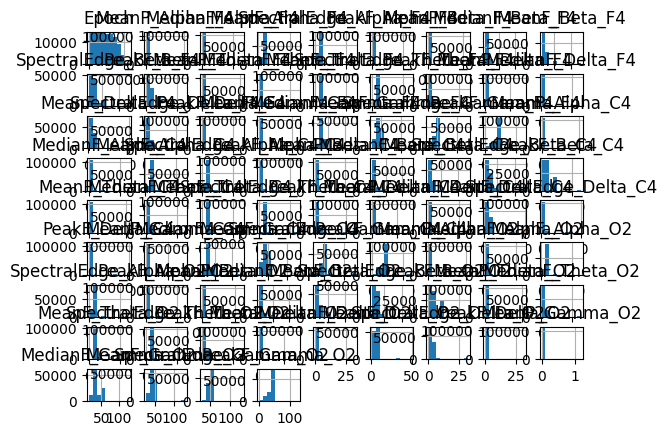

In [5]:
from matplotlib import pyplot
from pandas import read_csv

df.hist()
pyplot.show()

<ipython-input-6-e37aa941d13f>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_Sleep_Stage = df.corr()


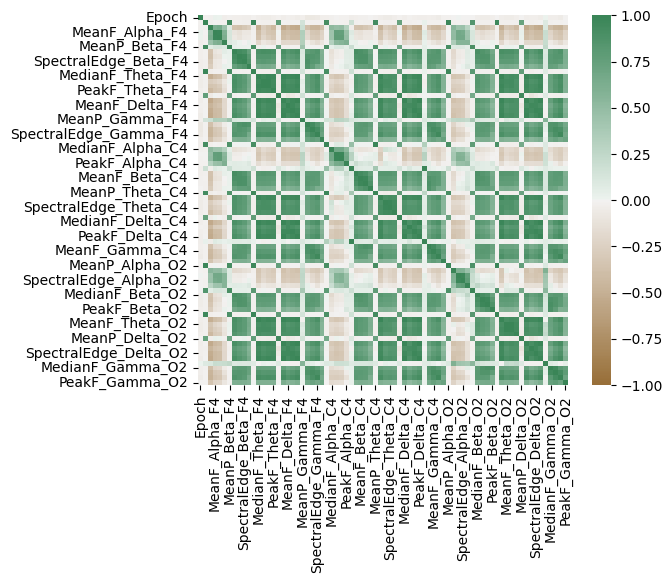

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation_Sleep_Stage = df.corr()

axis_corr = sns.heatmap(
correlation_Sleep_Stage,
vmin=-1, vmax=1, center=0,
cmap=sns.diverging_palette(50, 500, n=500),
square=True
)

plt.show()

In [7]:
df.head()

,Subject,Sleep_Stage,Epoch,MeanP_Alpha_F4,MedianF_Alpha_F4,MeanF_Alpha_F4,SpectralEdge_Alpha_F4,PeakF_Alpha_F4,MeanP_Beta_F4,MedianF_Beta_F4,...,MeanP_Delta_O2,MedianF_Delta_O2,MeanF_Delta_O2,SpectralEdge_Delta_O2,PeakF_Delta_O2,MeanP_Gamma_O2,MedianF_Gamma_O2,MeanF_Gamma_O2,SpectralEdge_Gamma_O2,PeakF_Gamma_O2
0,SN002,N1,6,0.00034,10.11512,17.85756,17.48293,10.24000,0.00047,17.73268,...,0.00112,0.74927,6.36878,2.87220,0.62439,0.000076,32.71805,43.83220,49.95122,49.95122
1,SN002,N1,7,0.00035,10.73951,17.60780,17.10829,9.11610,0.00048,16.85854,...,0.00070,0.99902,6.86829,3.62146,0.74927,0.000072,32.09366,44.33171,49.95122,49.95122
2,SN002,N1,8,0.00035,9.36585,17.60780,16.98341,9.24098,0.00042,17.35805,...,0.00077,1.49854,6.49366,4.12098,0.74927,0.000069,33.09268,43.95707,49.95122,49.95122
3,SN002,N1,116,0.00054,9.74049,15.98439,15.48488,8.36683,0.00051,14.61073,...,0.00082,0.87415,7.49268,3.49659,0.87415,0.000039,28.34732,43.08293,49.95122,49.95122
4,SN002,N1,117,0.00034,10.11512,16.48390,15.98439,12.23805,0.00034,15.11024,...,0.00084,0.87415,6.86829,2.87220,0.62439,0.000032,28.97171,43.20780,49.95122,49.95122


In [8]:
df.isnull().sum()

Subject                  0
Sleep_Stage              0
Epoch                    0
MeanP_Alpha_F4           0
MedianF_Alpha_F4         0
                        ..
MeanP_Gamma_O2           0
MedianF_Gamma_O2         0
MeanF_Gamma_O2           0
SpectralEdge_Gamma_O2    0
PeakF_Gamma_O2           0
Length: 78, dtype: int64

In [9]:
df = df.dropna().reset_index(drop=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108451 entries, 0 to 108450
Data columns (total 78 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Subject                108451 non-null  object 
 1   Sleep_Stage            108451 non-null  object 
 2   Epoch                  108451 non-null  int64  
 3   MeanP_Alpha_F4         108451 non-null  float64
 4   MedianF_Alpha_F4       108451 non-null  float64
 5   MeanF_Alpha_F4         108451 non-null  float64
 6   SpectralEdge_Alpha_F4  108451 non-null  float64
 7   PeakF_Alpha_F4         108451 non-null  float64
 8   MeanP_Beta_F4          108451 non-null  float64
 9   MedianF_Beta_F4        108451 non-null  float64
 10  MeanF_Beta_F4          108451 non-null  float64
 11  SpectralEdge_Beta_F4   108451 non-null  float64
 12  PeakF_Beta_F4          108451 non-null  float64
 13  MeanP_Theta_F4         108451 non-null  float64
 14  MedianF_Theta_F4       108451 non-nu

In [11]:
df.shape

(108451, 78)

#Converting N1,N2 -> Light_Sleep, N3 -> Deep_Sleep And removing W stage and R Stage.

In [12]:
df =df.replace("N1", "Light_Sleep")
df =df.replace("N2", "Light_Sleep")
df =df.replace("N3", "Deep_Sleep")
df.drop(df.index[df['Sleep_Stage'] == "R"], inplace = True)
df.drop(df.index[df['Sleep_Stage'] == "W"], inplace = True)

In [13]:
df.head()

,Subject,Sleep_Stage,Epoch,MeanP_Alpha_F4,MedianF_Alpha_F4,MeanF_Alpha_F4,SpectralEdge_Alpha_F4,PeakF_Alpha_F4,MeanP_Beta_F4,MedianF_Beta_F4,...,MeanP_Delta_O2,MedianF_Delta_O2,MeanF_Delta_O2,SpectralEdge_Delta_O2,PeakF_Delta_O2,MeanP_Gamma_O2,MedianF_Gamma_O2,MeanF_Gamma_O2,SpectralEdge_Gamma_O2,PeakF_Gamma_O2
0,SN002,Light_Sleep,6,0.00034,10.11512,17.85756,17.48293,10.24000,0.00047,17.73268,...,0.00112,0.74927,6.36878,2.87220,0.62439,0.000076,32.71805,43.83220,49.95122,49.95122
1,SN002,Light_Sleep,7,0.00035,10.73951,17.60780,17.10829,9.11610,0.00048,16.85854,...,0.00070,0.99902,6.86829,3.62146,0.74927,0.000072,32.09366,44.33171,49.95122,49.95122
2,SN002,Light_Sleep,8,0.00035,9.36585,17.60780,16.98341,9.24098,0.00042,17.35805,...,0.00077,1.49854,6.49366,4.12098,0.74927,0.000069,33.09268,43.95707,49.95122,49.95122
3,SN002,Light_Sleep,116,0.00054,9.74049,15.98439,15.48488,8.36683,0.00051,14.61073,...,0.00082,0.87415,7.49268,3.49659,0.87415,0.000039,28.34732,43.08293,49.95122,49.95122
4,SN002,Light_Sleep,117,0.00034,10.11512,16.48390,15.98439,12.23805,0.00034,15.11024,...,0.00084,0.87415,6.86829,2.87220,0.62439,0.000032,28.97171,43.20780,49.95122,49.95122


In [14]:
df.shape

(72631, 78)

#Removing columns

In [15]:
df = df.loc[:,df.columns != "Subject"]
df = df.loc[:,df.columns != "Epoch"]

#Encoding target columns (Sleep Stage)

In [16]:
target="Sleep_Stage"

In [17]:
df[target].value_counts()

Light_Sleep    51341
Deep_Sleep     21290
Name: Sleep_Stage, dtype: int64

In [18]:
from sklearn.preprocessing import LabelEncoder
encd = LabelEncoder()

In [19]:
df[target] = encd.fit_transform(df[target])

In [20]:
df[target].value_counts()

1    51341
0    21290
Name: Sleep_Stage, dtype: int64

#Spliting Dataset into X(features) and y(target)

In [21]:
X = df.loc[:,df.columns != target]
y = df[target]

#Scaling Dataset

In [22]:
X

,MeanP_Alpha_F4,MedianF_Alpha_F4,MeanF_Alpha_F4,SpectralEdge_Alpha_F4,PeakF_Alpha_F4,MeanP_Beta_F4,MedianF_Beta_F4,MeanF_Beta_F4,SpectralEdge_Beta_F4,PeakF_Beta_F4,...,MeanP_Delta_O2,MedianF_Delta_O2,MeanF_Delta_O2,SpectralEdge_Delta_O2,PeakF_Delta_O2,MeanP_Gamma_O2,MedianF_Gamma_O2,MeanF_Gamma_O2,SpectralEdge_Gamma_O2,PeakF_Gamma_O2
0,0.00034,10.11512,17.85756,17.48293,10.24000,0.00047,17.73268,25.35024,27.47317,14.36098,...,0.00112,0.74927,6.36878,2.87220,0.62439,0.000076,32.71805,43.83220,49.95122,49.95122
1,0.00035,10.73951,17.60780,17.10829,9.11610,0.00048,16.85854,25.22537,26.97366,16.60878,...,0.00070,0.99902,6.86829,3.62146,0.74927,0.000072,32.09366,44.33171,49.95122,49.95122
2,0.00035,9.36585,17.60780,16.98341,9.24098,0.00042,17.35805,26.09951,28.47220,14.98537,...,0.00077,1.49854,6.49366,4.12098,0.74927,0.000069,33.09268,43.95707,49.95122,49.95122
3,0.00054,9.74049,15.98439,15.48488,8.36683,0.00051,14.61073,21.72878,22.47805,14.86049,...,0.00082,0.87415,7.49268,3.49659,0.87415,0.000039,28.34732,43.08293,49.95122,49.95122
4,0.00034,10.11512,16.48390,15.98439,12.23805,0.00034,15.11024,22.10341,23.47707,12.23805,...,0.00084,0.87415,6.86829,2.87220,0.62439,0.000032,28.97171,43.20780,49.95122,49.95122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72626,0.00027,9.49073,15.23512,14.36098,10.36488,0.00021,13.98634,22.60293,23.72683,11.86341,...,0.00769,0.99902,4.49561,2.12293,1.24878,0.000022,25.97463,36.33951,44.33171,25.97463
72627,0.00024,9.61561,15.60976,14.61073,10.86439,0.00020,14.48585,22.85268,23.85171,10.86439,...,0.00871,0.74927,4.49561,1.99805,0.62439,0.000021,26.22439,36.46439,43.70732,21.60390
72628,0.00026,10.24000,15.36000,14.36098,11.23902,0.00022,13.86146,22.72780,23.60195,11.23902,...,0.00672,0.74927,4.74537,1.99805,0.49951,0.000023,26.09951,35.46537,43.08293,26.59902
72629,0.00026,8.61659,15.36000,14.23610,11.11415,0.00020,14.23610,22.97756,24.10146,11.11415,...,0.00719,0.87415,4.74537,1.99805,0.99902,0.000021,25.97463,36.08976,43.95707,49.95122


In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X)

X[X.columns] =   scaler.transform(X)

<ipython-input-23-fd1652dd9516>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[X.columns] =   scaler.transform(X)


In [24]:
X

,MeanP_Alpha_F4,MedianF_Alpha_F4,MeanF_Alpha_F4,SpectralEdge_Alpha_F4,PeakF_Alpha_F4,MeanP_Beta_F4,MedianF_Beta_F4,MeanF_Beta_F4,SpectralEdge_Beta_F4,PeakF_Beta_F4,...,MeanP_Delta_O2,MedianF_Delta_O2,MeanF_Delta_O2,SpectralEdge_Delta_O2,PeakF_Delta_O2,MeanP_Gamma_O2,MedianF_Gamma_O2,MeanF_Gamma_O2,SpectralEdge_Gamma_O2,PeakF_Gamma_O2
0,-0.100254,0.594647,0.735686,0.793088,0.203764,-0.087913,0.087781,-0.093541,-0.061905,-0.294668,...,-0.170223,-0.188472,-0.010991,-0.157303,-0.144859,-0.102356,-0.322010,-0.085130,-0.032963,0.432258
1,-0.098638,0.923647,0.673299,0.704268,-0.013581,-0.085613,0.028687,-0.102278,-0.095811,-0.179058,...,-0.175185,-0.121487,0.140591,0.050615,-0.111643,-0.102654,-0.365447,-0.041591,-0.032963,0.432258
2,-0.098638,0.199846,0.673299,0.674661,0.010569,-0.099413,0.062455,-0.041116,0.005908,-0.262554,...,-0.174358,0.012486,0.026905,0.189230,-0.111643,-0.102875,-0.295948,-0.074246,-0.032963,0.432258
3,-0.067944,0.397249,0.267796,0.319387,-0.158479,-0.078713,-0.123271,-0.346928,-0.400966,-0.268977,...,-0.173767,-0.154978,0.330069,0.015964,-0.078427,-0.105171,-0.626067,-0.150439,-0.032963,0.432258
4,-0.100254,0.594647,0.392566,0.437812,0.590156,-0.117813,-0.089503,-0.320715,-0.333154,-0.403857,...,-0.173531,-0.154978,0.140591,-0.157303,-0.144859,-0.105713,-0.582630,-0.139555,-0.032963,0.432258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72626,-0.111562,0.265647,0.080640,0.052931,0.227913,-0.147713,-0.165481,-0.285765,-0.316201,-0.423125,...,-0.092604,-0.121487,-0.579427,-0.365223,0.021218,-0.106506,-0.791127,-0.738218,-0.592522,-1.074448
72627,-0.116409,0.331448,0.174219,0.112142,0.324511,-0.150013,-0.131713,-0.268290,-0.307724,-0.474508,...,-0.080554,-0.188472,-0.579427,-0.399877,-0.144859,-0.106537,-0.773752,-0.727333,-0.654695,-1.349108
72628,-0.113178,0.660448,0.111833,0.052931,0.396959,-0.145413,-0.173923,-0.277028,-0.324677,-0.455239,...,-0.104064,-0.188472,-0.503634,-0.399877,-0.178074,-0.106445,-0.782440,-0.814411,-0.716868,-1.035211
72629,-0.113178,-0.194949,0.111833,0.023324,0.372811,-0.150013,-0.148597,-0.259553,-0.290771,-0.461662,...,-0.098512,-0.154978,-0.503634,-0.399877,-0.045214,-0.106567,-0.791127,-0.759987,-0.629826,0.432258


#Spliting X and y to train and test sets

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test_val, y_train, y_test_val= train_test_split(X,y, test_size=0.3,random_state=42)

#we divided 70:30 = train:test_val. Now we have 70% data in our test set. Then we devided 30% into half. So we have 15% of total data in trest and validation.
X_test, X_val, y_test, y_val= train_test_split(X_test_val, y_test_val, train_size=.5, random_state=42)

In [26]:
X_train.shape[0],X_val.shape[0],X_test.shape[0]

(50841, 10895, 10895)

In [27]:
X_train

,MeanP_Alpha_F4,MedianF_Alpha_F4,MeanF_Alpha_F4,SpectralEdge_Alpha_F4,PeakF_Alpha_F4,MeanP_Beta_F4,MedianF_Beta_F4,MeanF_Beta_F4,SpectralEdge_Beta_F4,PeakF_Beta_F4,...,MeanP_Delta_O2,MedianF_Delta_O2,MeanF_Delta_O2,SpectralEdge_Delta_O2,PeakF_Delta_O2,MeanP_Gamma_O2,MedianF_Gamma_O2,MeanF_Gamma_O2,SpectralEdge_Gamma_O2,PeakF_Gamma_O2
27540,-0.155181,-4.669346,-3.506514,-3.322189,-1.752345,-0.196014,7.533690,7.079937,6.753226,5.543678,...,-0.183455,8.184753,7.757628,7.951573,8.192192,-0.108162,6.297749,7.240336,7.726252,5.329050
68165,0.061295,-0.392352,-0.262480,-0.361559,-0.182628,0.017887,-0.190807,0.098684,1.446917,1.535836,...,0.243388,-0.188472,-0.693113,-0.538490,-0.111643,-0.070018,0.876844,0.448224,-0.020528,0.432258
52225,-0.051789,-0.260750,-0.387250,-0.391166,0.252063,-0.113213,-0.325880,-0.390615,-0.485731,-0.493776,...,0.040895,-0.121487,-0.693113,-0.365223,-0.045214,-0.092904,0.868156,0.448224,-0.020528,0.432258
71448,-0.082483,-0.326551,-0.480827,-0.450377,-0.617318,-0.140813,-0.334323,-0.477990,-0.578973,-0.435971,...,-0.012860,-0.221965,-0.465741,-0.399877,-0.144859,-0.106819,-0.304636,-0.161324,-0.032963,0.432258
62702,-0.076021,-1.050351,-0.418443,-0.539197,-0.399973,-0.147713,-0.359649,-0.364403,-0.468779,-0.525890,...,-0.087643,-0.154978,-0.352052,-0.226611,-0.078427,-0.090616,0.876844,0.448224,-0.020528,0.432258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37194,-0.006555,-0.458153,-0.200094,-0.154314,-0.279226,-0.069513,-0.241460,-0.504202,-0.578973,-0.339628,...,-0.133363,-0.087994,-0.162574,-0.191957,-0.078427,-0.106041,-0.756377,-0.792642,-0.692000,-0.493738
6265,-0.037250,-0.194949,0.610916,0.556237,0.566006,-0.005113,0.079339,0.177321,0.226297,-0.410279,...,1.682578,-0.288952,-0.882591,-0.677105,-0.211290,-0.086038,-0.261198,-0.400790,-0.269221,-0.556517
54886,-0.058251,-0.392352,-0.012937,-0.124707,0.324511,-0.101713,-0.199249,-0.294503,-0.350107,-0.474508,...,-0.094377,-0.154978,-0.238366,-0.157303,-0.178074,-0.105812,-0.183012,-0.030706,0.439554,0.432258
860,-0.118024,0.134051,0.579722,0.556237,-0.544871,-0.131613,0.070897,0.098684,1.455394,1.535836,...,-0.162662,-0.054500,0.064801,0.293189,-0.111643,-0.104988,-0.660817,-0.183094,-0.032963,0.432258


In [28]:
y_train.value_counts()

1    35941
0    14900
Name: Sleep_Stage, dtype: int64

#Oversampling using SMOTE
SNB: We used SMOTE in train data only, so that our test data can remain corrupted data free. The accurecy of the model will be counted only for actual data.

In [29]:
!pip install imbalanced-learn

In [30]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_train,y_train = smote.fit_resample(X_train,y_train)

In [31]:
y_train.value_counts()

1    35941
0    35941
Name: Sleep_Stage, dtype: int64

In [32]:
y_test.value_counts()

1    7750
0    3145
Name: Sleep_Stage, dtype: int64

#Model Selection & Training

ADABOOST

For Deafult Hyparameters

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada_defult = AdaBoostClassifier()
ada_defult.fit(X_train, y_train)
y_pred_val = ada_defult.predict(X_val)


print("Accurecy: ",accuracy_score(y_val, y_pred_val))

Accurecy:  0.8374483708122992


Tunning n_estimators(done)

  0%|          | 0/50 [00:00<?, ?it/s]

1/250 round completed......................... Val Accuracy: 0.722533272143185 >>>>>>Train Accuracy: 0.7655880470771542
6/250 round completed......................... Val Accuracy: 0.8067921064708582 >>>>>>Train Accuracy: 0.8150023649870621
11/250 round completed......................... Val Accuracy: 0.8090867370353373 >>>>>>Train Accuracy: 0.8251300742884171
16/250 round completed......................... Val Accuracy: 0.8131252868288206 >>>>>>Train Accuracy: 0.8340474666815058
21/250 round completed......................... Val Accuracy: 0.8220284534189995 >>>>>>Train Accuracy: 0.8396677888762138
26/250 round completed......................... Val Accuracy: 0.8252409362092703 >>>>>>Train Accuracy: 0.8457332851061462
31/250 round completed......................... Val Accuracy: 0.8275355667737494 >>>>>>Train Accuracy: 0.8492668540107399
36/250 round completed......................... Val Accuracy: 0.8322166131252868 >>>>>>Train Accuracy: 0.8537464177401853
41/250 round completed.....

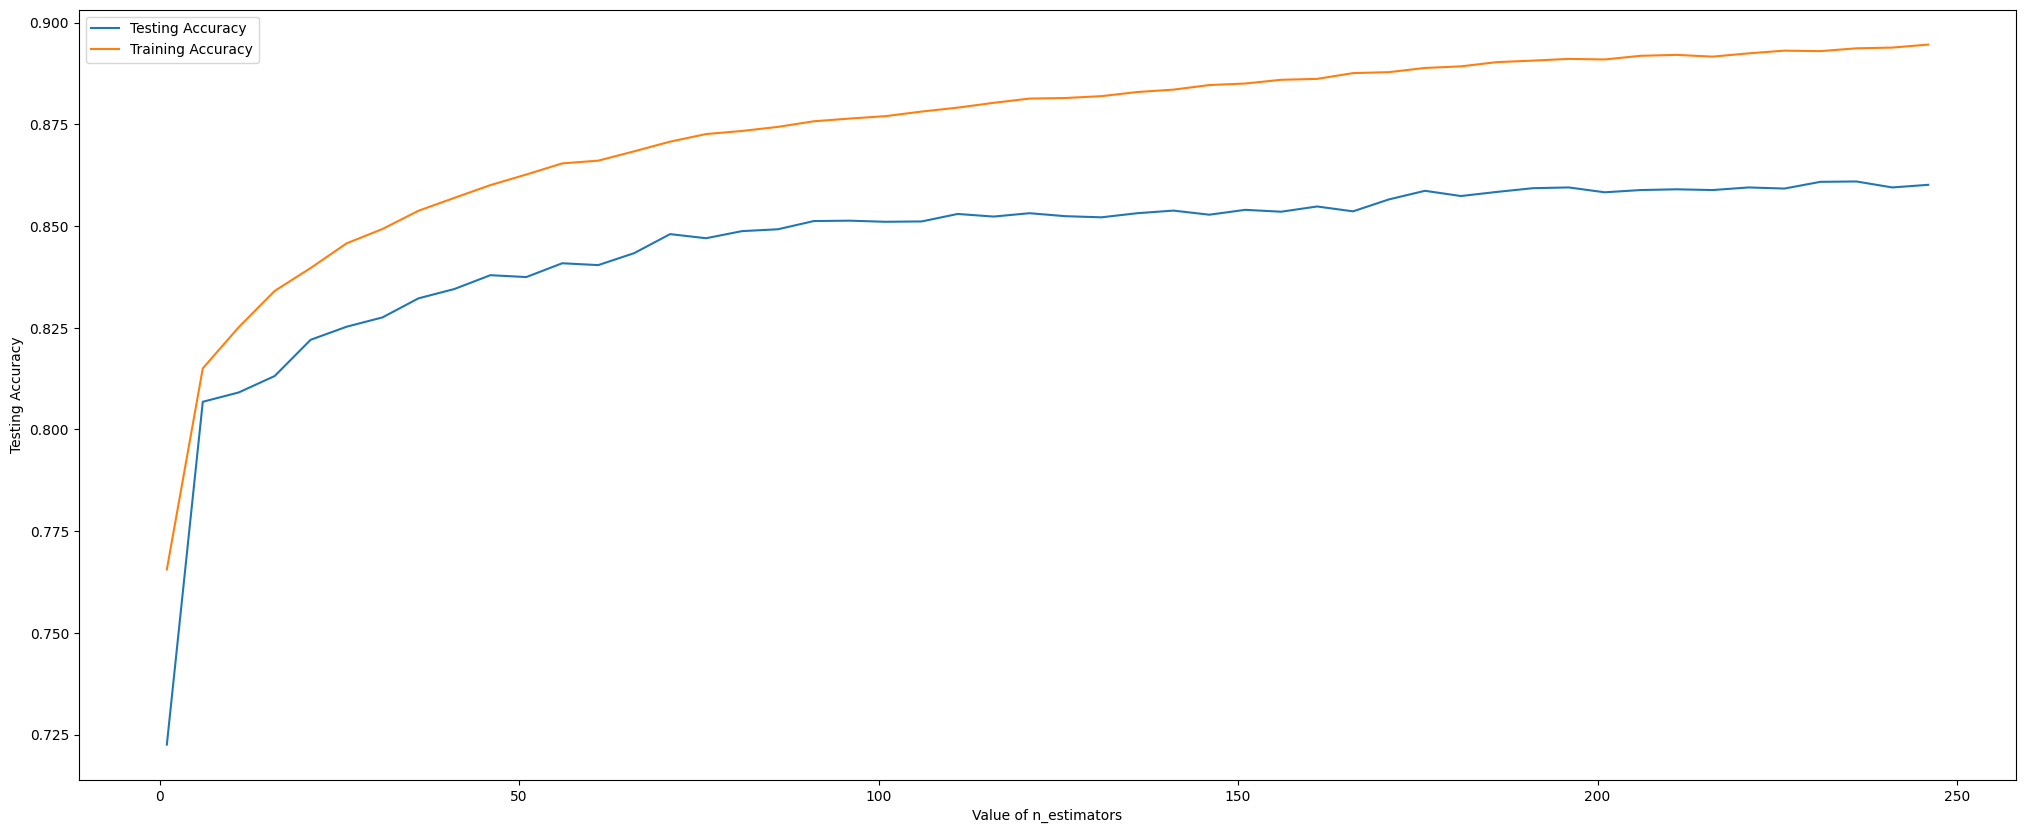

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
N=250
k_range = range (1,N+1,5)
scores={}
scores_list = []
score_list_train = []
for k in tqdm(k_range):
  classifier = AdaBoostClassifier(n_estimators=k,random_state=0)
  classifier.fit(X_train, y_train)

  y_pred=classifier.predict(X_val)
  val_accu = accuracy_score(y_val,y_pred)
  scores[k] = val_accu
  scores_list.append(val_accu)

  y_pred=classifier.predict(X_train)
  train_accu = accuracy_score(y_train,y_pred)
  score_list_train.append(train_accu)

  print(str(k)+"/"+str(N)+" round completed......................... Val Accuracy: "+str(val_accu),">>>>>>Train Accuracy: "+str(train_accu))



%matplotlib inline
import matplotlib.pyplot as plt
#plot the relationship between K and the testing accuracy
plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.plot(k_range,score_list_train)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')
plt.legend(["Testing Accuracy", "Training Accuracy"], loc=0, frameon=True)



print("The best n_estimators:")
best_estimator=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_estimator)

In [ ]:
ada_best_estimator = AdaBoostClassifier(n_estimators=best_estimator,random_state=0)
ada_best_estimator.fit(X_train, y_train)
y_pred = ada_best_estimator.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.79      0.77      3145
           1       0.91      0.89      0.90      7750

    accuracy                           0.86     10895
   macro avg       0.83      0.84      0.83     10895
weighted avg       0.86      0.86      0.86     10895

Accurecy:  0.8623221661312529


Graddient Boosting

Deafult Hyperparameters

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gradBoost_default = GradientBoostingClassifier()
gradBoost_default.fit(X_train, y_train)
y_pred_val = gradBoost_default.predict(X_val)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_val, y_pred_val))
print(classification_report(y_val,y_pred_val))
print("Accurecy: ",accuracy_score(y_val, y_pred_val))

[[2627  618]
 [ 889 6761]]
              precision    recall  f1-score   support

           0       0.75      0.81      0.78      3245
           1       0.92      0.88      0.90      7650

    accuracy                           0.86     10895
   macro avg       0.83      0.85      0.84     10895
weighted avg       0.87      0.86      0.86     10895

Accurecy:  0.8616796695731987


Tunning n_estimators

  0%|          | 0/17 [00:00<?, ?it/s]

370/450 round completed.........................Val Accurecy: 0.8893070215695273  >>>Train Accuracy: 0.9261150218413511
375/450 round completed.........................Val Accurecy: 0.8892152363469481  >>>Train Accuracy: 0.9265184608107732
380/450 round completed.........................Val Accurecy: 0.8892152363469481  >>>Train Accuracy: 0.9267827828941877
385/450 round completed.........................Val Accurecy: 0.889123451124369  >>>Train Accuracy: 0.9269497231573969
390/450 round completed.........................Val Accurecy: 0.8894905920146856  >>>Train Accuracy: 0.9272696919952144
395/450 round completed.........................Val Accurecy: 0.889674162459844  >>>Train Accuracy: 0.9274922790128266
400/450 round completed.........................Val Accurecy: 0.890224873795319  >>>Train Accuracy: 0.9280070114910548
405/450 round completed.........................Val Accurecy: 0.8899495181275815  >>>Train Accuracy: 0.9278400712278456
410/450 round completed....................

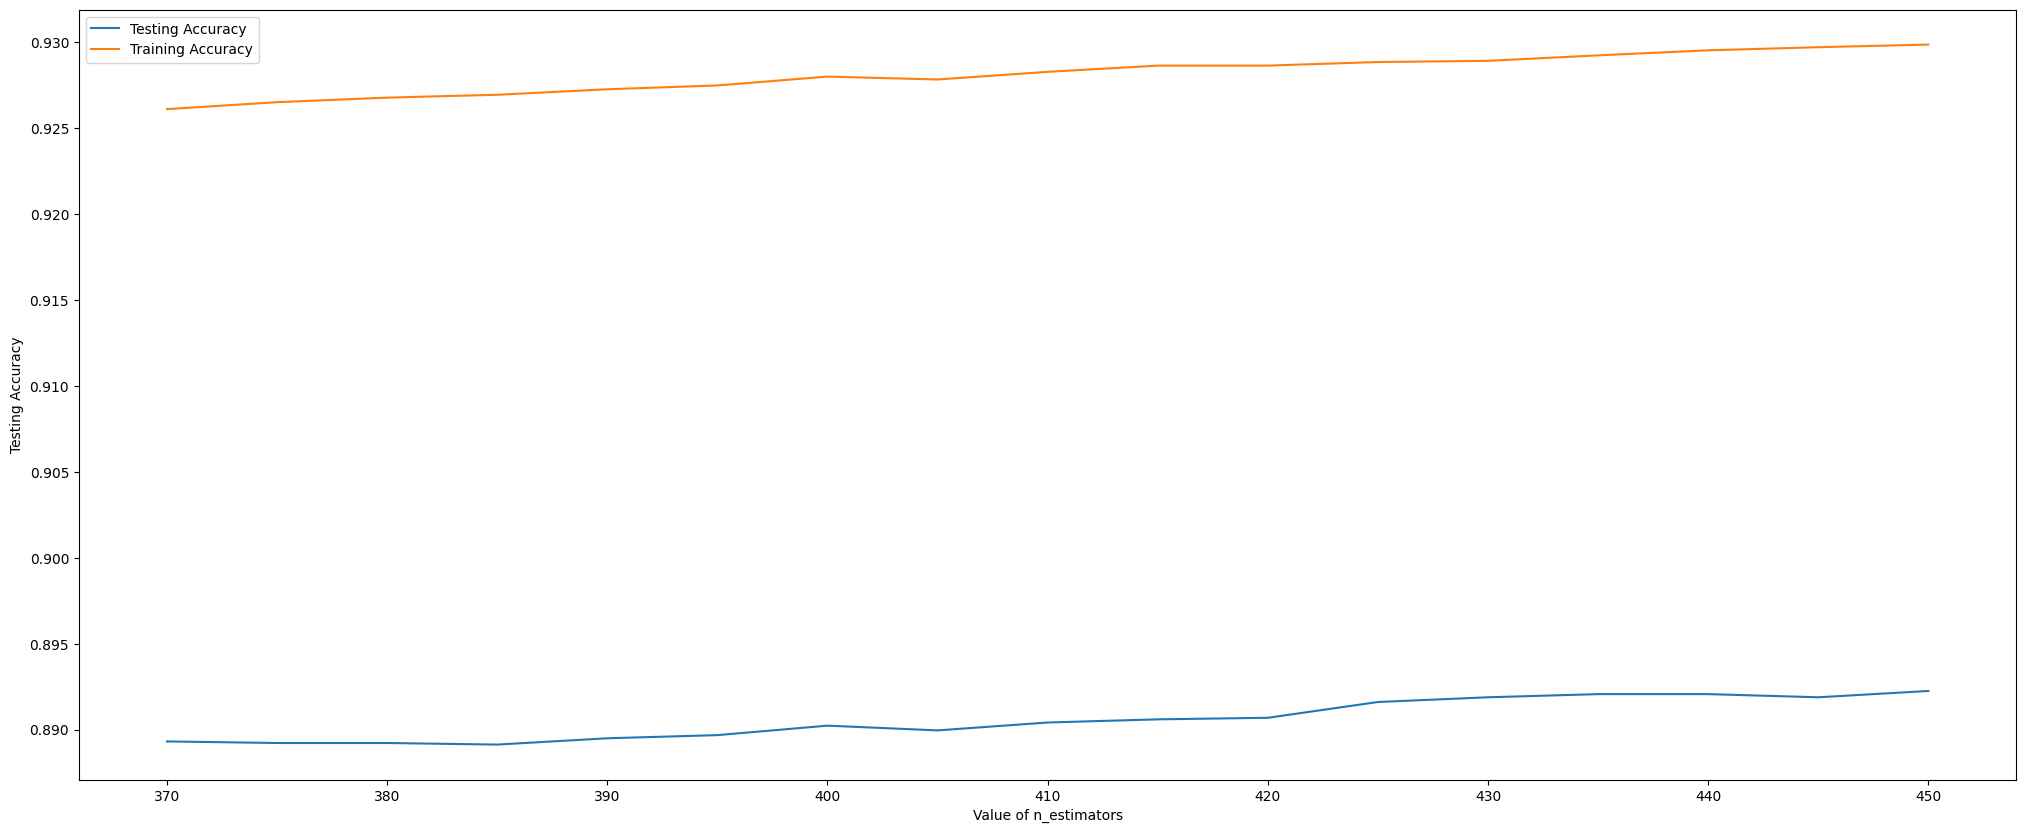

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
N=450
k_range = range (370,N+1,5)
scores={}
scores_list = []
scores_list_train = []
for k in tqdm(k_range):
  classifier = GradientBoostingClassifier(n_estimators=k,random_state=0)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_val)
  val_accu =  accuracy_score(y_val,y_pred)
  scores[k] =val_accu
  scores_list.append(val_accu)

  y_pred=classifier.predict(X_train)
  train_accu = accuracy_score(y_train,y_pred)
  scores_list_train.append(train_accu)


  print(str(k)+"/"+str(N)+" round completed.........................Val Accurecy: "+str(val_accu)," >>>Train Accuracy: "+str(train_accu))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.plot(k_range,scores_list_train)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')
plt.legend(["Testing Accuracy", "Training Accuracy"], loc=0, frameon=True)



print("The best n_estimators:")
best_estimator=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_estimator)

Tunning max_depth (done)

  0%|          | 0/10 [00:00<?, ?it/s]

1/50 round completed.........................Val Accuracy: 0.8241395135383204  Training Accuracy0.8393339083497955
6/50 round completed.........................Val Accuracy: 0.8923359339146397  Training Accuracy0.9380790740380067
11/50 round completed.........................Val Accuracy: 0.9105094079853143  Training Accuracy0.9938927687042654
16/50 round completed.........................Val Accuracy: 0.9091326296466269  Training Accuracy0.9942683842964859
21/50 round completed.........................Val Accuracy: 0.8944469940339606  Training Accuracy0.9942683842964859
26/50 round completed.........................Val Accuracy: 0.8727856815052777  Training Accuracy0.9942683842964859
31/50 round completed.........................Val Accuracy: 0.8575493345571363  Training Accuracy0.9942683842964859
36/50 round completed.........................Val Accuracy: 0.8491968793024323  Training Accuracy0.9942683842964859
41/50 round completed.........................Val Accuracy: 0.847269389628

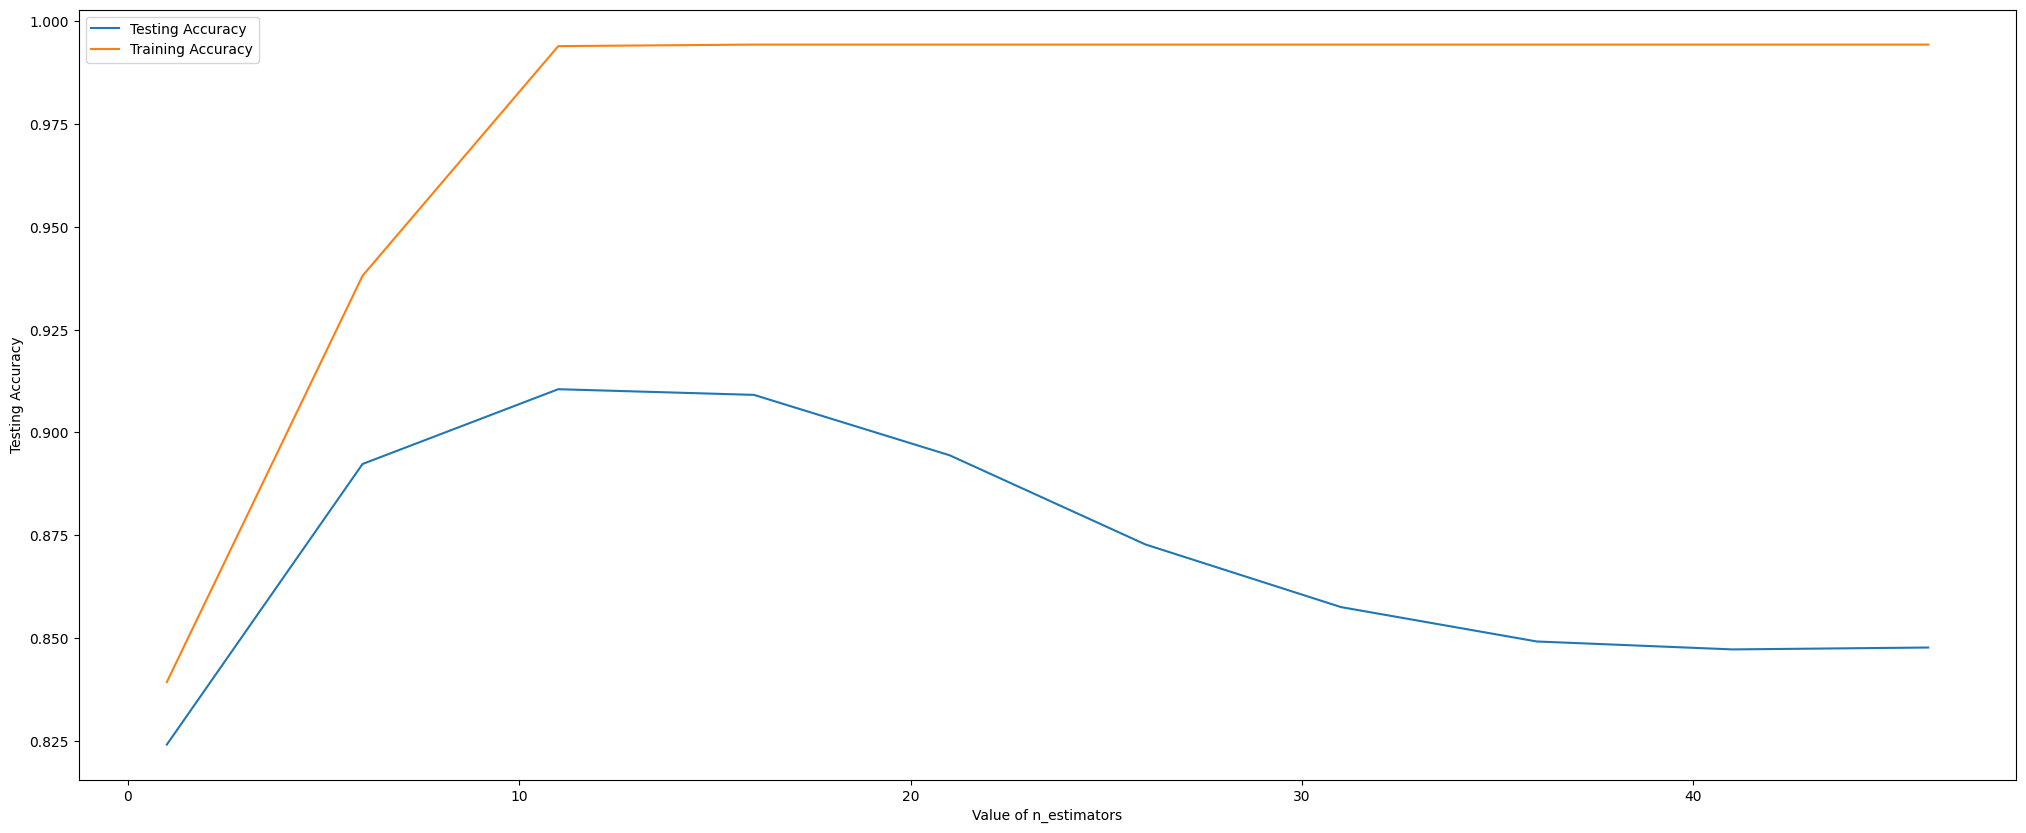

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
N=50
k_range = range (1,N+1,5)
scores={}
scores_list = []
scores_list_train = []
for k in tqdm(k_range):
  classifier = GradientBoostingClassifier(max_depth=k,random_state=0)
  classifier.fit(X_train, y_train)

  y_pred=classifier.predict(X_val)
  val_accu = accuracy_score(y_val,y_pred)
  scores[k] = val_accu
  scores_list.append(val_accu)

  y_pred=classifier.predict(X_train)
  train_accu =  accuracy_score(y_train,y_pred)
  scores_list_train.append(train_accu)

  print(str(k)+"/"+str(N)+" round completed.........................Val Accuracy: "+str(val_accu)," Training Accuracy"+str(train_accu))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.plot(k_range,scores_list_train)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')
plt.legend(["Testing Accuracy", "Training Accuracy"], loc=0, frameon=True)



print("The best Depth:")
best_depth=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_depth)

In [ ]:
gradBoost_estimator = GradientBoostingClassifier(n_estimators=best_estimator,random_state=0)
gradBoost_estimator.fit(X_train, y_train)
y_pred = gradBoost_estimator.predict(X_test)
print("Accurecy: ",accuracy_score(y_test, y_pred))

Accurecy:  0.8949977053694356


In [ ]:
gradBoost_depth = GradientBoostingClassifier(max_depth=best_depth,random_state=0)
gradBoost_depth.fit(X_train, y_train)
y_pred = gradBoost_depth.predict(X_test)
print("Accurecy: ",accuracy_score(y_test, y_pred))

Accurecy:  0.9143643873336393


In [ ]:
gradBoost_all = GradientBoostingClassifier(n_estimators=best_estimator,max_depth=best_depth,random_state=0)
gradBoost_all.fit(X_train, y_train)
y_pred = gradBoost_all.predict(X_test)
print("Accurecy: ",accuracy_score(y_test, y_pred))

Accurecy:  0.9206975676916016


#XGB

Deafult Hyperparameters

In [ ]:
import xgboost as xgb
xgb_deafult = xgb.XGBClassifier()
xgb_deafult.fit(X_train.values,y_train.values)
y_pred_val = xgb_deafult.predict(X_val.values)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_val, y_pred_val))
print(classification_report(y_val,y_pred_val))
print("Accurecy: ",accuracy_score(y_val, y_pred_val))

[[2703  542]
 [ 434 7216]]
              precision    recall  f1-score   support

           0       0.86      0.83      0.85      3245
           1       0.93      0.94      0.94      7650

    accuracy                           0.91     10895
   macro avg       0.90      0.89      0.89     10895
weighted avg       0.91      0.91      0.91     10895

Accurecy:  0.9104176227627352


Tunning n_estimators (done)

  0%|          | 0/50 [00:00<?, ?it/s]

1/250 round completed......................... Val Accureay: 0.819458467186783  >>>>>>Training Accuracy: 0.846150635764169
6/250 round completed......................... Val Accureay: 0.855162918770078  >>>>>>Training Accuracy: 0.8781892546117248
11/250 round completed......................... Val Accureay: 0.8661771454795778  >>>>>>Training Accuracy: 0.8948971926212403
16/250 round completed......................... Val Accureay: 0.8727856815052777  >>>>>>Training Accuracy: 0.9083358838095769
21/250 round completed......................... Val Accureay: 0.8801284993116109  >>>>>>Training Accuracy: 0.9197712918394034
26/250 round completed......................... Val Accureay: 0.8849931161083066  >>>>>>Training Accuracy: 0.9265601958765755
31/250 round completed......................... Val Accureay: 0.8883891693437357  >>>>>>Training Accuracy: 0.9314292868868423
36/250 round completed......................... Val Accureay: 0.8926112895823772  >>>>>>Training Accuracy: 0.93604796750229

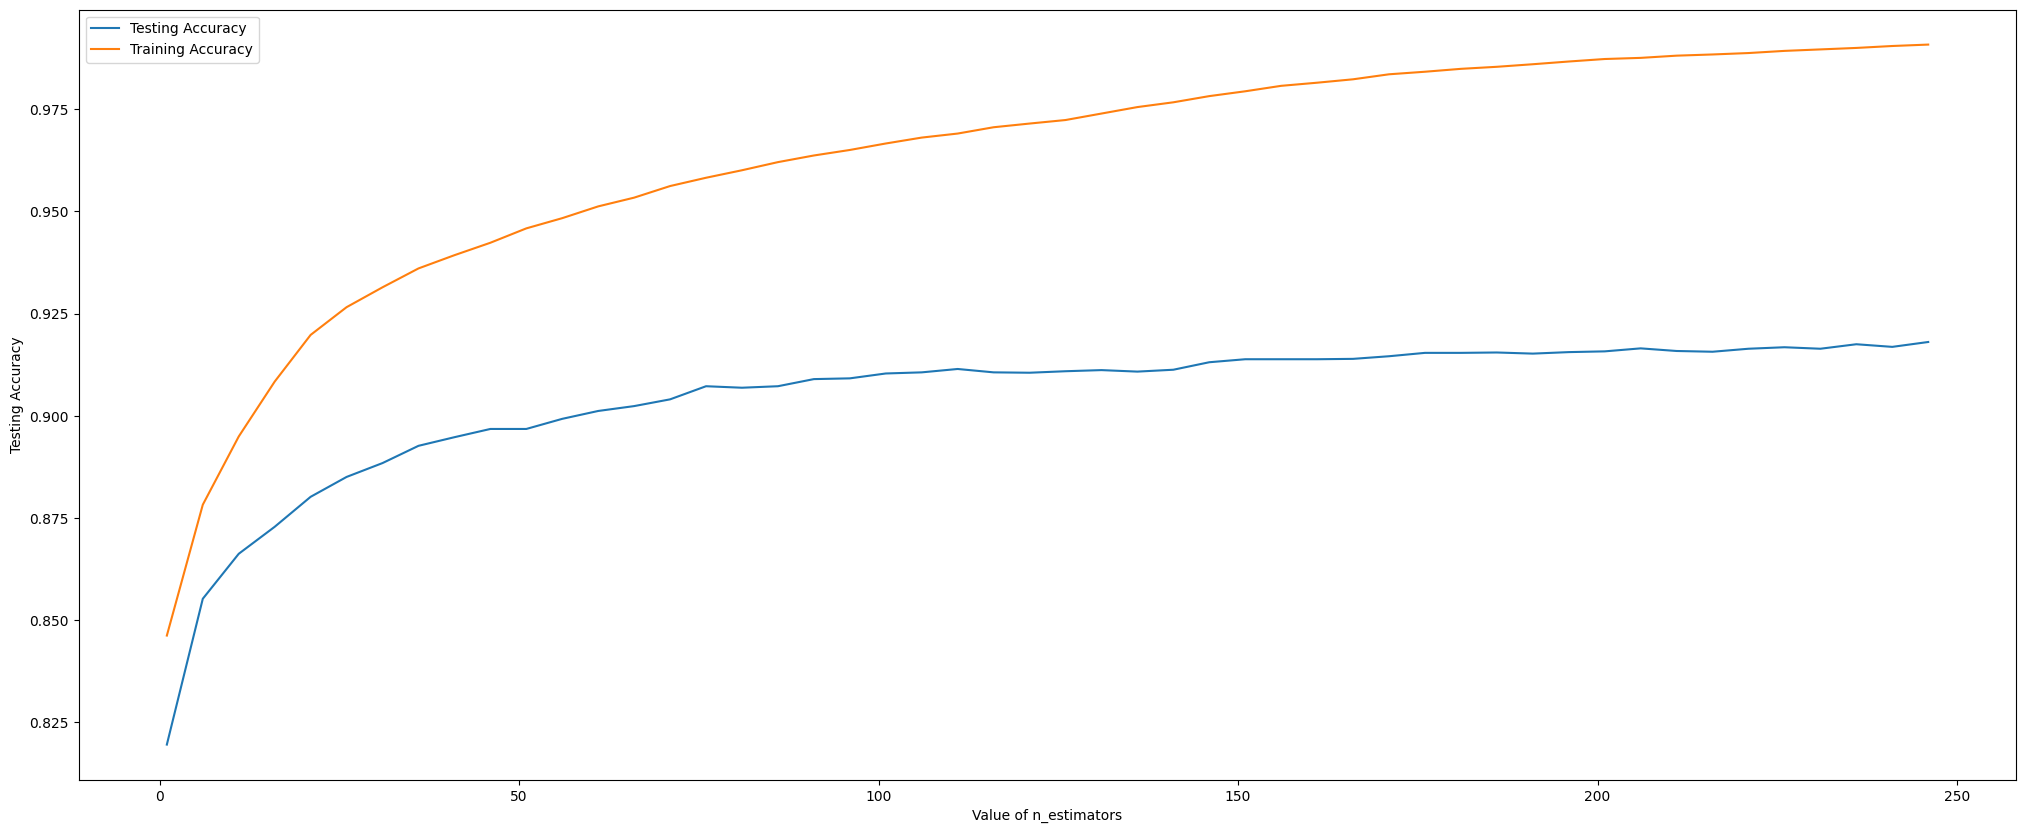

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
N=250
k_range = range (1,N+1,5)
scores={}
scores_list = []
scores_list_train = []
for k in tqdm(k_range):
  xgb_classifier = xgb.XGBClassifier(n_estimators=k,random_state=0)
  xgb_classifier.fit(X_train.values, y_train.values)

  y_pred=xgb_classifier.predict(X_val.values)
  val_accu = accuracy_score(y_val,y_pred)
  scores[k] = val_accu
  scores_list.append(val_accu)

  y_pred=xgb_classifier.predict(X_train.values)
  train_accu = accuracy_score(y_train,y_pred)
  scores_list_train.append(train_accu)


  print(str(k)+"/"+str(N)+" round completed......................... Val Accureay: "+str(val_accu)," >>>>>>Training Accuracy: "+str(train_accu))


%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.plot(k_range,scores_list_train)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')
plt.legend(["Testing Accuracy", "Training Accuracy"], loc=0, frameon=True)


print("The best n_estimators:")
best_estimator=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_estimator)

Tunning max_depth(done)

  0%|          | 0/10 [00:00<?, ?it/s]

1/50 round completed......................... Val Accuracy: 0.8397430013767784  >>>>>>> Train Accuracy: 0.8552349684204669
6/50 round completed......................... Val Accuracy: 0.9064708581918312  >>>>>>> Train Accuracy: 0.9657772460421246
11/50 round completed......................... Val Accuracy: 0.9144561725562185  >>>>>>> Train Accuracy: 0.9941710024762805
16/50 round completed......................... Val Accuracy: 0.9149150986691142  >>>>>>> Train Accuracy: 0.9941710024762805
21/50 round completed......................... Val Accuracy: 0.9139972464433226  >>>>>>> Train Accuracy: 0.9941710024762805
26/50 round completed......................... Val Accuracy: 0.9137218907755851  >>>>>>> Train Accuracy: 0.9941710024762805
31/50 round completed......................... Val Accuracy: 0.9148233134465351  >>>>>>> Train Accuracy: 0.9941710024762805
36/50 round completed......................... Val Accuracy: 0.9129876089949518  >>>>>>> Train Accuracy: 0.9941710024762805
41/50 roun

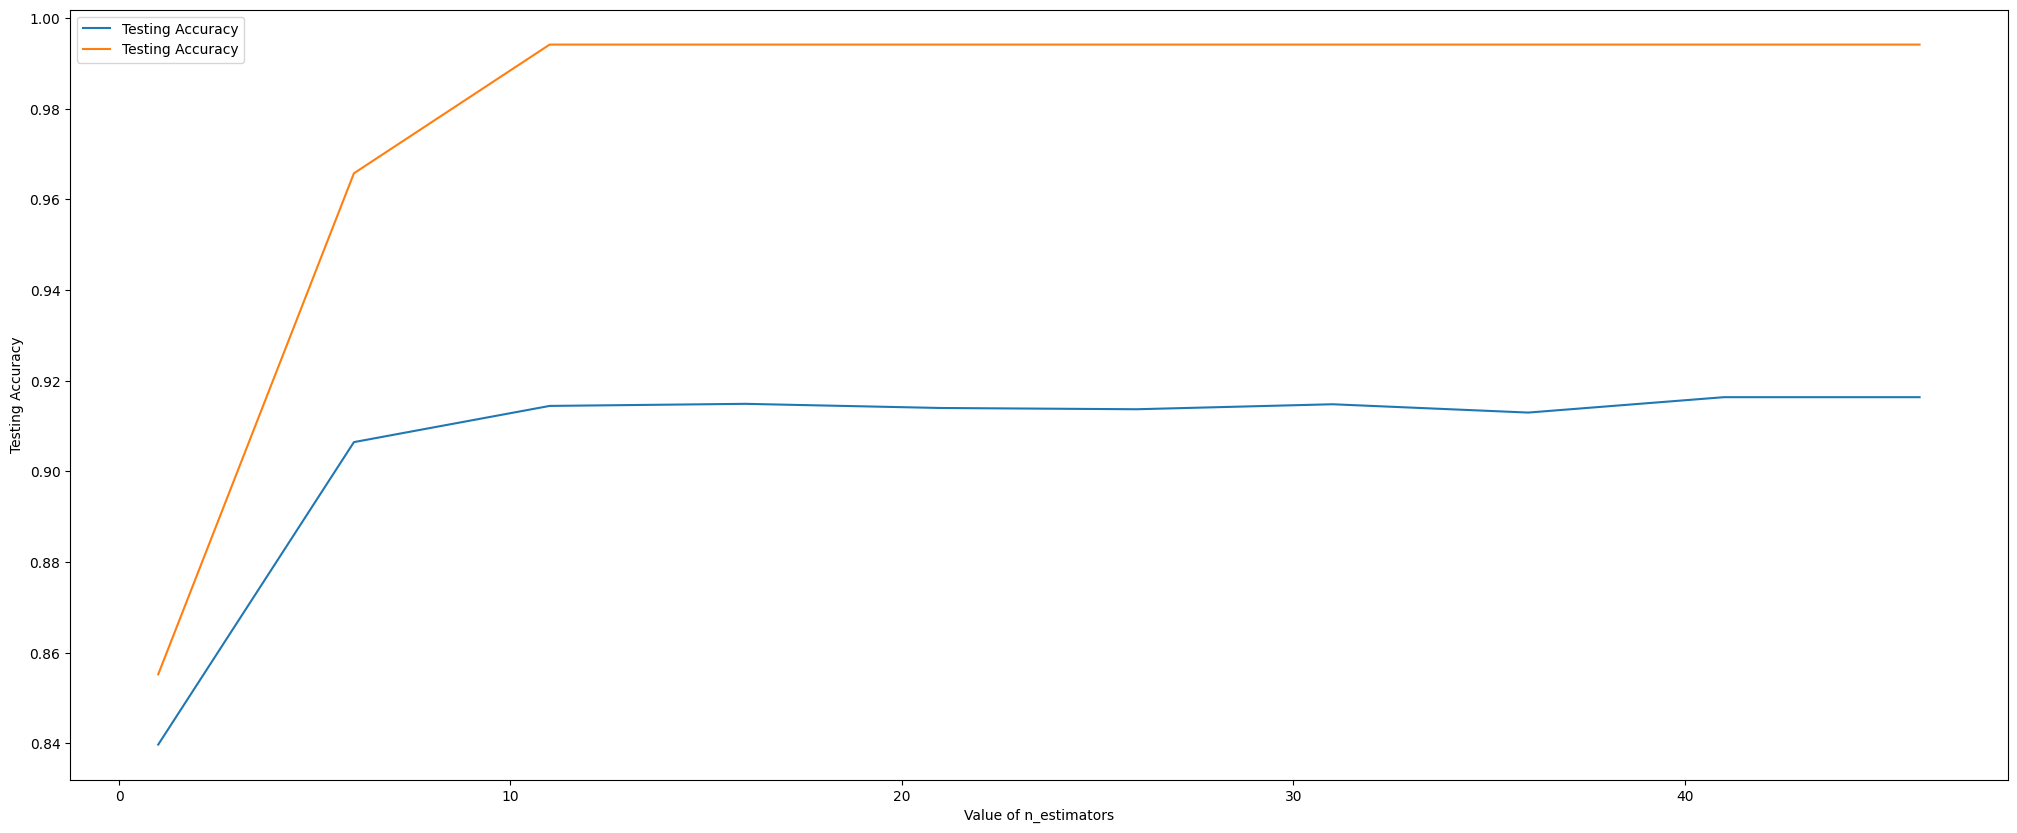

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
N=50
k_range = range (1,N+1,5)
scores={}
scores_list = []
scores_list_train = []
for k in tqdm(k_range):
  xgb_classifier = xgb.XGBClassifier(max_depth=k,random_state=0)
  xgb_classifier.fit(X_train.values, y_train.values)

  y_pred=xgb_classifier.predict(X_val.values)
  val_accu = accuracy_score(y_val,y_pred)
  scores[k] = val_accu
  scores_list.append(val_accu)

  y_pred=xgb_classifier.predict(X_train.values)
  train_accu = accuracy_score(y_train,y_pred)
  scores_list_train.append(train_accu)


  print(str(k)+"/"+str(N)+" round completed......................... Val Accuracy: "+str(val_accu)," >>>>>>> Train Accuracy: "+str(train_accu))


%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.plot(k_range,scores_list_train)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')
plt.legend(["Testing Accuracy", "Testing Accuracy"], loc=0, frameon=True)


print("The best depth:")
best_depth=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_depth)

In [ ]:
xgb_depth = xgb.XGBClassifier(max_depth=best_depth,random_state=0)
xgb_depth.fit(X_train.values,y_train.values)
y_pred = xgb_depth.predict(X_test.values)
print("Accurecy: ",accuracy_score(y_test, y_pred))

Accurecy:  0.9173932996787517


In [ ]:
xgb_estimator = xgb.XGBClassifier(n_estimators=best_estimator,random_state=0)
xgb_estimator.fit(X_train.values,y_train.values)
y_pred = xgb_estimator.predict(X_test.values)
print("Accurecy: ",accuracy_score(y_test, y_pred))

Accurecy:  0.9177604405690684


In [ ]:
xgb_all = xgb.XGBClassifier(n_estimators=best_estimator,max_depth=best_depth,random_state=0)
xgb_all.fit(X_train.values,y_train.values)
y_pred = xgb_all.predict(X_test.values)

print("Accurecy: ",accuracy_score(y_test, y_pred))

Accurecy:  0.92088113813676


#RandomForestClassifier

Deafult Hyperparameters

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_default = RandomForestClassifier()
rf_default.fit(X_train, y_train)
y_pred_val=rf_default.predict(X_val)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_val, y_pred_val))
print(classification_report(y_val,y_pred_val))
print("Accurecy: ",accuracy_score(y_val, y_pred_val))

[[2743  502]
 [ 534 7116]]
              precision    recall  f1-score   support

           0       0.84      0.85      0.84      3245
           1       0.93      0.93      0.93      7650

    accuracy                           0.90     10895
   macro avg       0.89      0.89      0.89     10895
weighted avg       0.91      0.90      0.91     10895

Accurecy:  0.9049105094079853


Tunning n_estimators (done)

196/250 round completed......................... Val Accuracy: 0.9054612207434602  >>>>>>> Train Accuracy: 0.9942683842964859
201/250 round completed......................... Val Accuracy: 0.9061037173015145  >>>>>>> Train Accuracy: 0.9942683842964859
206/250 round completed......................... Val Accuracy: 0.9053694355208811  >>>>>>> Train Accuracy: 0.9942683842964859
211/250 round completed......................... Val Accuracy: 0.9054612207434602  >>>>>>> Train Accuracy: 0.9942683842964859
216/250 round completed......................... Val Accuracy: 0.9053694355208811  >>>>>>> Train Accuracy: 0.9942683842964859
221/250 round completed......................... Val Accuracy: 0.905277650298302  >>>>>>> Train Accuracy: 0.9942683842964859
226/250 round completed......................... Val Accuracy: 0.9053694355208811  >>>>>>> Train Accuracy: 0.9942683842964859
231/250 round completed......................... Val Accuracy: 0.9057365764111978  >>>>>>> Train Accuracy: 0.9942683842

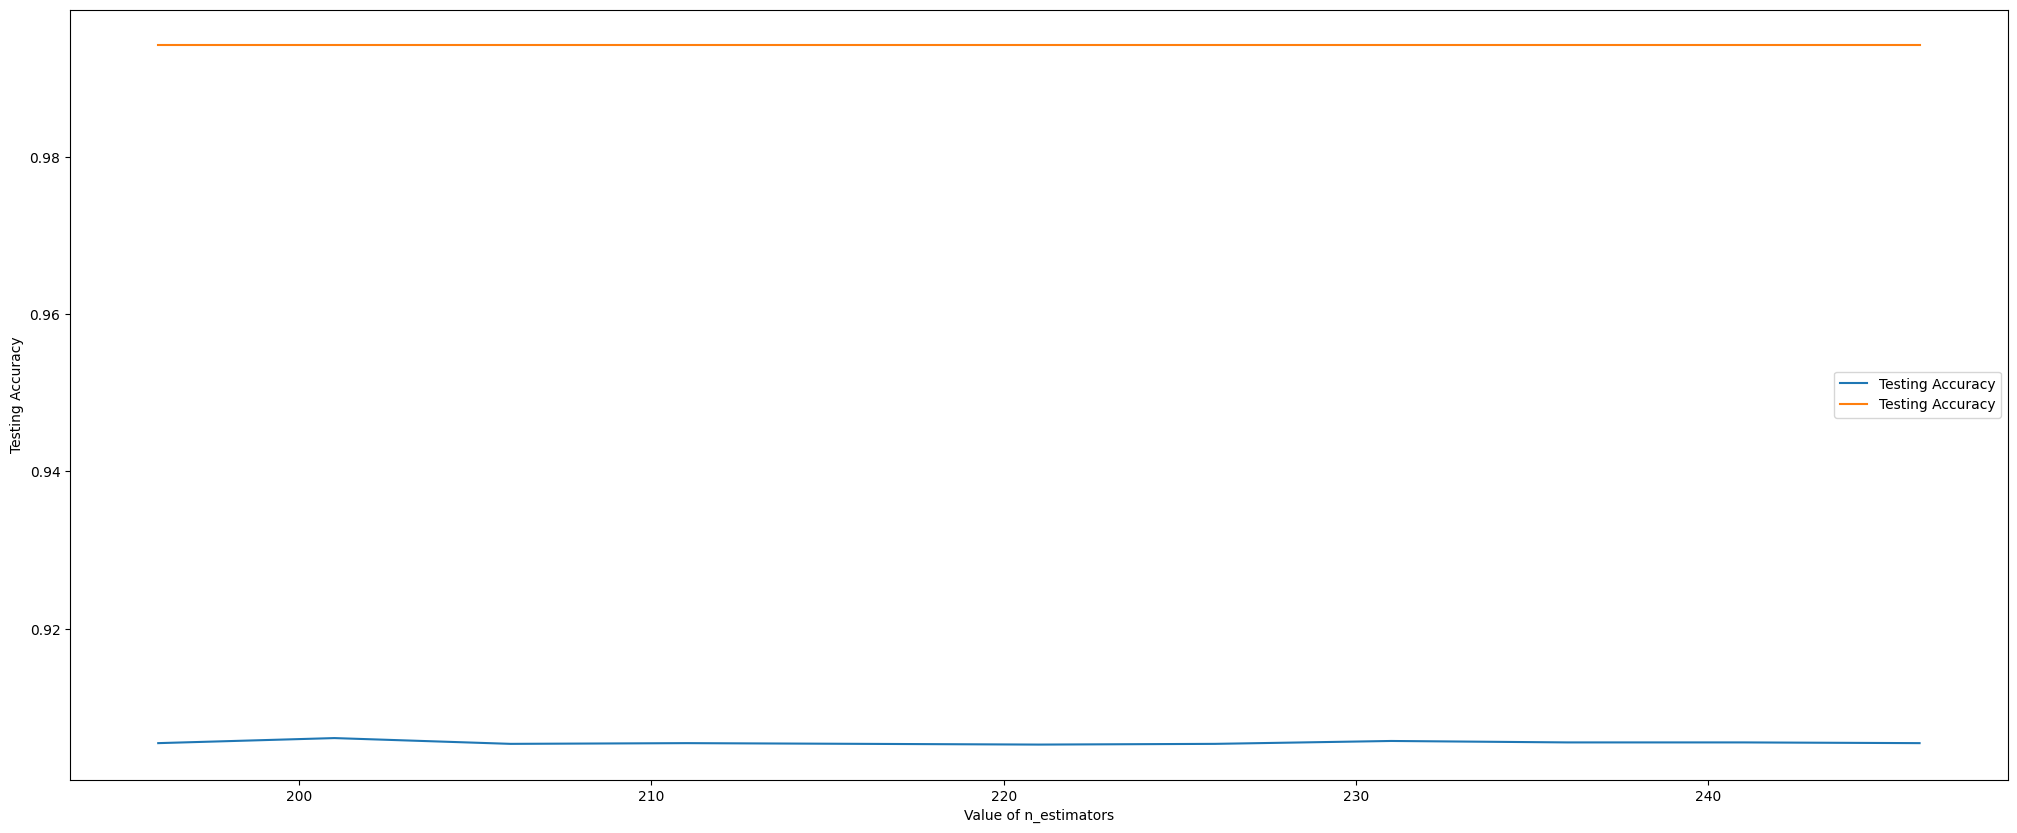

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
N=250
k_range = range (196,N+1,5)
scores={}
scores_list = []
scores_list_train = []
for k in k_range:
  classifier = RandomForestClassifier(n_estimators=k,random_state=0)
  classifier.fit(X_train, y_train)


  y_pred=classifier.predict(X_val)
  val_accu = accuracy_score(y_val,y_pred)
  scores[k] = val_accu
  scores_list.append(val_accu)

  y_pred=classifier.predict(X_train)
  train_accu = accuracy_score(y_train,y_pred)
  scores_list_train.append(train_accu)

  print(str(k)+"/"+str(N)+" round completed......................... Val Accuracy: "+str(val_accu)," >>>>>>> Train Accuracy: "+str(train_accu))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.plot(k_range,scores_list_train)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')
plt.legend(["Testing Accuracy", "Testing Accuracy"], loc=0, frameon=True)


print("The best n_estimators:")
best_estimator=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_estimator)

Tunning max_depth(done)

1/50 round completed......................... Val Accuracy: 0.7746672785681505  >>>>>>> Train Accuracy: 0.7975292841045046
6/50 round completed......................... Val Accuracy: 0.844056906837999  >>>>>>> Train Accuracy: 0.8651400907042097
11/50 round completed......................... Val Accuracy: 0.8787517209729233  >>>>>>> Train Accuracy: 0.9309284660972149
16/50 round completed......................... Val Accuracy: 0.8972005507113354  >>>>>>> Train Accuracy: 0.9784925294232214
21/50 round completed......................... Val Accuracy: 0.9037173015144562  >>>>>>> Train Accuracy: 0.9894688517292229
26/50 round completed......................... Val Accuracy: 0.9031665901789812  >>>>>>> Train Accuracy: 0.9928076569934059
31/50 round completed......................... Val Accuracy: 0.902524093620927  >>>>>>> Train Accuracy: 0.994087532344676
36/50 round completed......................... Val Accuracy: 0.9046351537402478  >>>>>>> Train Accuracy: 0.9942683842964859
41/50 round c

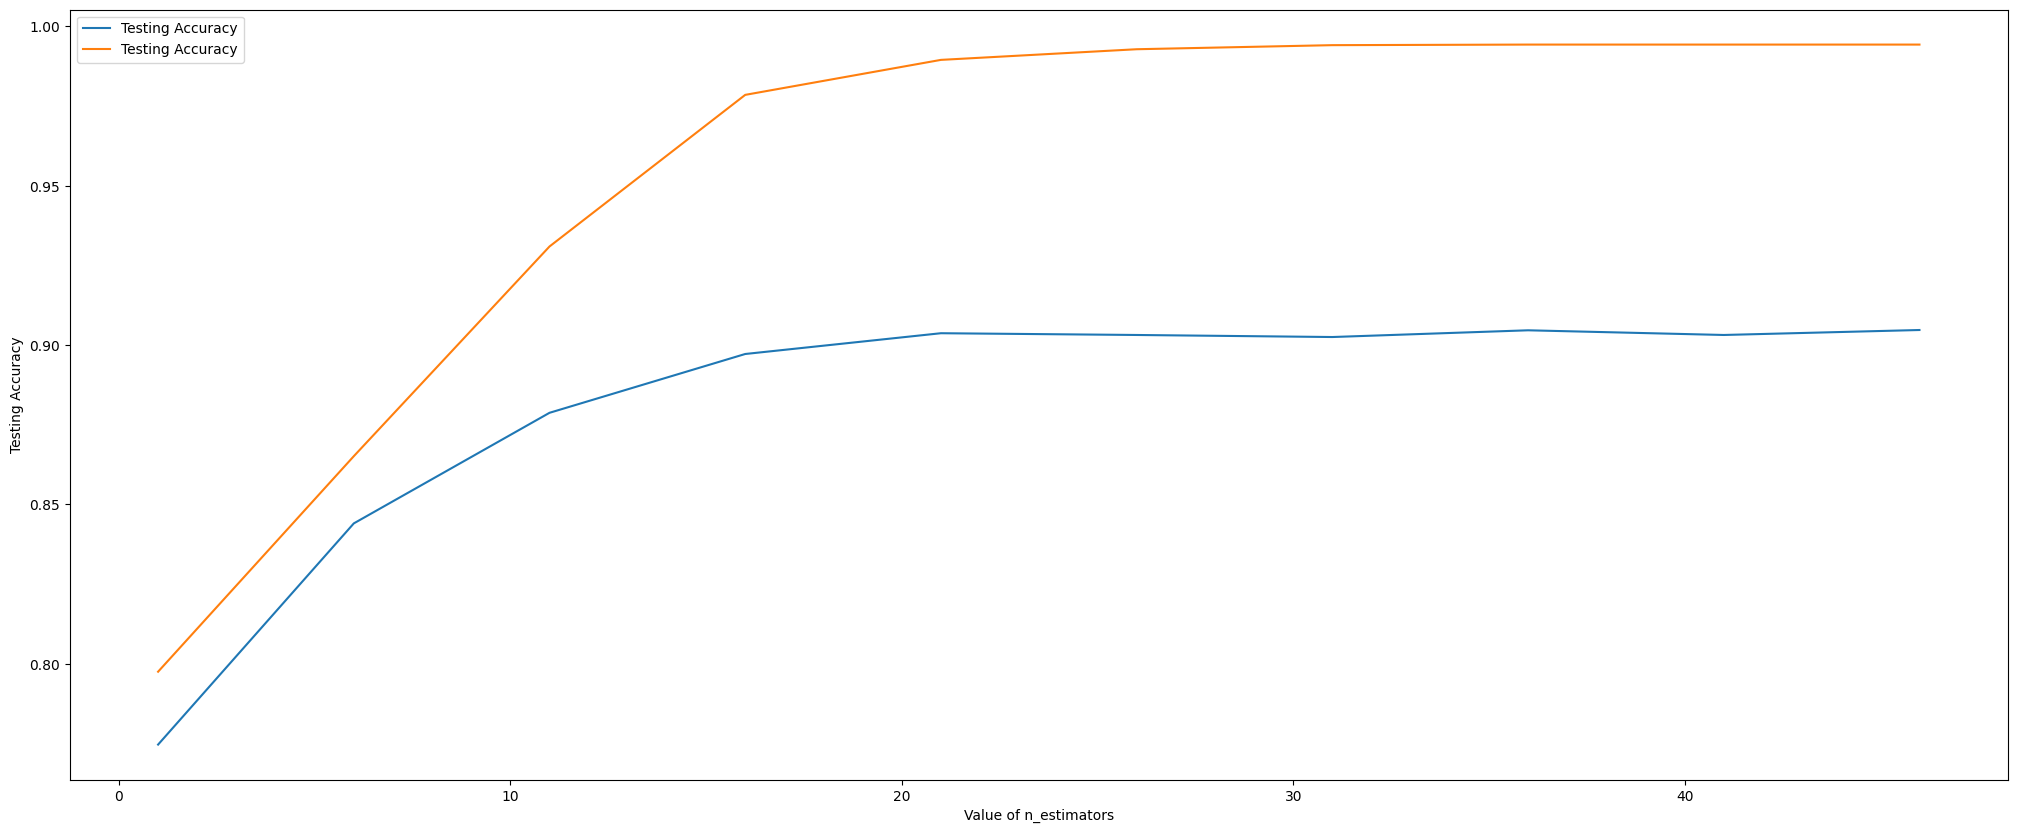

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
N=50
k_range = range (1,N+1,5)
scores={}
scores_list = []
scores_list_train = []
for k in k_range:
  classifier = RandomForestClassifier(max_depth=k,random_state=0)
  classifier.fit(X_train, y_train)

  y_pred=classifier.predict(X_val)
  val_accu = accuracy_score(y_val,y_pred)
  scores[k] = val_accu
  scores_list.append(val_accu)

  y_pred=classifier.predict(X_train)
  train_accu = accuracy_score(y_train,y_pred)
  scores_list_train.append(train_accu)


  print(str(k)+"/"+str(N)+" round completed......................... Val Accuracy: "+str(val_accu)," >>>>>>> Train Accuracy: "+str(train_accu))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.plot(k_range,scores_list_train)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')
plt.legend(["Testing Accuracy", "Testing Accuracy"], loc=0, frameon=True)


print("The best Depth:")
best_depth=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_depth)

In [39]:
rf_estimator = RandomForestClassifier(n_estimators=best_estimator,random_state=0)
rf_estimator.fit(X_train, y_train)
y_pred=rf_estimator.predict(X_test)
print("Accurecy: ",accuracy_score(y_test, y_pred))

Accurecy:  0.9076640660853602


In [40]:
rf_depth = RandomForestClassifier(max_depth=best_depth,random_state=0)
rf_depth.fit(X_train, y_train)
y_pred=rf_depth.predict(X_test)
print("Accurecy: ",accuracy_score(y_test, y_pred))

Accurecy:  0.9055530059660395


In [41]:
rf_all = RandomForestClassifier(n_estimators=best_estimator,max_depth=best_depth,random_state=0)
rf_all.fit(X_train, y_train)
y_pred=rf_all.predict(X_test)
print("Accurecy: ",accuracy_score(y_test, y_pred))

Accurecy:  0.9079394217530977
